In [3]:
import numpy as np
import pandas as pd
from scipy import signal, optimize
import matplotlib.pyplot as plt

df_j = pd.read_csv('C:\\Users\\obinna.izima\\Documents\\Documents from Desktop_14.06.2020\\traces_March 8\\testcurves.csv')
xr = df_j['Jitter'][:1001].values



We can split the dataset into three sub-datasets using a simple criterion as first derivative estimate using first difference to assess it. The goal is to detect when curve drastically goes up or down (where dataset should be split. First derivative is estimated as follow):

In [27]:
def func(x,a,b):
    return a*np.exp(b*x)

In [7]:
N = len(xr)
t = np.linspace(0,10,N)

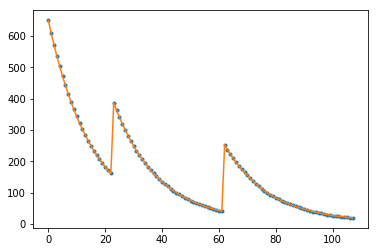

In [31]:
plt.plot(xr, '.')
plt.plot(xr, '-')

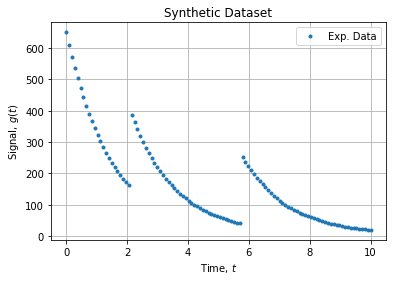

In [9]:
fig, axe = plt.subplots()
axe.plot(t, xr, '.', label='Exp. Data')
#axe.plot(t, x, '-', label='Exact')
axe.set_title("Synthetic Dataset")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Signal, $g(t)$")
axe.legend()
axe.grid()

In [10]:
dxrdt = np.abs(np.diff(xr)/np.diff(t))

In [20]:
xcrit = 450

In [21]:
q = np.where(dxrdt > xcrit)
q

(array([22, 61], dtype=int64),)

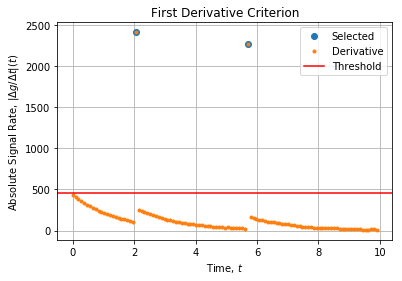

In [22]:
fig, axe = plt.subplots()
axe.plot(t[q[0]], dxrdt[q[0]], 'o', label='Selected')
axe.plot(t[:-1], dxrdt, '.', label='Derivative')
axe.axhline(xcrit, color="red", label='Threshold')
axe.set_title("First Derivative Criterion")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Absolute Signal Rate, $|\Delta g/\Delta t|(t)$")
axe.legend()
axe.grid()

In [25]:
idx = [0] + list(q[0]+1) + [t.size]
idx

[0, 23, 62, 108]

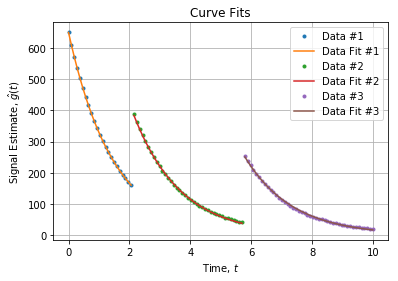

In [28]:
trials = []
fig, axe = plt.subplots()
for k, (i, j) in enumerate(zip(idx[:-1], idx[1:])):
    p, s = optimize.curve_fit(func, t[i:j]-t[i], xr[i:j])
    axe.plot(t[i:j], xr[i:j], '.', label="Data #{}".format(k+1))
    axe.plot(t[i:j], func(t[i:j]-t[i], *p), label="Data Fit #{}".format(k+1))
    trials.append({"n0": i, "n1": j, "t0": t[i], "a": p[0], "b": p[1],
                   "s_a": s[0,0], "s_b": s[1,1], "s_ab": s[0,1]})
axe.set_title("Curve Fits")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Signal Estimate, $\hat{g}(t)$")
axe.legend()
axe.grid()

In [29]:
df = pd.DataFrame(trials)

In [30]:
df

,a,b,n0,n1,s_a,s_ab,s_b,t0
0,649.378018,-0.680643,0,23,0.065015,-0.000097,2.640016e-07,0.000000
1,383.561038,-0.649979,23,62,0.669652,-0.001270,4.788677e-06,2.149533
2,250.794381,-0.640060,62,108,0.531930,-0.001452,8.063216e-06,5.794393
